In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob

from finta import TA

In [2]:
df = pd.concat([pd.read_csv(f) for f in glob.glob("../data/raw_kraken_trade_histories/*.csv")], ignore_index=True)

In [5]:
df = df.sort_values('timestamp')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376159 entries, 942714 to 913087
Data columns (total 8 columns):
trade_id     object
timestamp    object
tradeable    object
price        float64
size         int64
aggressor    object
type         object
rti          float64
dtypes: float64(2), int64(1), object(5)
memory usage: 163.2+ MB


In [7]:
df.head(10)

,trade_id,timestamp,tradeable,price,size,aggressor,type,rti
942714,53f39f4f-11d1-4c34-bdad-6deb6a803f1f,2018-01-01 00:05:06,TI_XBTUSD_180105,13729.0,2900,seller,fill,13813.30
942715,4adc018e-40cc-4b00-8ae0-0500f66221c8,2018-01-01 00:05:22,FI_XBTUSD_180112,13710.0,5000,seller,fill,13800.39
942716,8bdc5e58-966b-4d33-a1f8-addfafe8d296,2018-01-01 00:05:59,TI_XBTUSD_180105,13684.0,2900,seller,fill,13765.11
942717,a620732c-602b-45f7-bf8b-971582a72443,2018-01-01 00:06:01,TI_XBTUSD_180105,13696.0,5800,buyer,fill,13766.56
942718,d4f304af-f599-4360-a259-052fdd806891,2018-01-01 00:26:11,FI_XBTUSD_180316,13895.0,1000,buyer,fill,13712.34
942719,fb8e6656-fea2-4027-8b30-4a14c8fc4c38,2018-01-01 00:27:08,TI_XBTUSD_180105,13640.0,12000,buyer,fill,13719.88
942720,f062fda5-2d48-4045-ba82-732ca27515a2,2018-01-01 00:27:18,TI_XBTUSD_180112,13559.0,7000,buyer,fill,13719.23
942721,4baa8220-97e0-4210-a689-1a3ff7c0af98,2018-01-01 00:27:21,TI_XBTUSD_180112,13572.0,7000,buyer,fill,13733.63
942722,2184e41a-b443-4c49-9252-89e739ddf71c,2018-01-01 00:33:43,TI_XBTUSD_180112,13592.0,8000,seller,fill,13746.14
942723,aa70c61f-05ee-4578-af0d-e356ef99962a,2018-01-01 00:36:33,TI_XBTUSD_180112,13577.0,7000,buyer,fill,13732.18


In [8]:
df.tradeable.unique()

array(['TI_XBTUSD_180105', 'FI_XBTUSD_180112', 'FI_XBTUSD_180316',
       'TI_XBTUSD_180112', 'FI_XBTUSD_180105', 'FI_XBTUSD_180615',
       'FI_XRPUSD_180105', 'FI_XRPUSD_180112', 'FV_XRPXBT_180112',
       'FV_XRPXBT_180105', 'FI_XRPUSD_180615', 'FI_XRPUSD_180316',
       'FV_XRPXBT_180316', 'FV_XRPXBT_180615', 'FI_XBTUSD_180119',
       'TI_XBTUSD_180119', 'FI_XRPUSD_180119', 'FV_XRPXBT_180119',
       'FI_XRPUSD_180126', 'TI_XBTUSD_180126', 'FI_XBTUSD_180126',
       'FV_XRPXBT_180126', 'FI_XRPUSD_180202', 'FI_XBTUSD_180202',
       'TI_XBTUSD_180202', 'FV_XRPXBT_180202', 'FI_XRPUSD_180209',
       'FV_XRPXBT_180209', 'FI_XBTUSD_180209', 'TI_XBTUSD_180209',
       'FI_XRPUSD_180216', 'TI_XBTUSD_180216', 'FI_XBTUSD_180216',
       'FV_XRPXBT_180216', 'FI_XRPUSD_180223', 'FI_XBTUSD_180223',
       'TI_XBTUSD_180223', 'FV_XRPXBT_180223', 'TI_XBTUSD_180302',
       'FI_XRPUSD_180302', 'FI_XBTUSD_180302', 'FV_XRPXBT_180302',
       'FI_XBTUSD_180309', 'TI_XBTUSD_180309', 'FI_XRPUSD_1803

In [9]:
df.type.unique()

array(['fill', 'liquidation', 'assignment'], dtype=object)

/home/alex/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


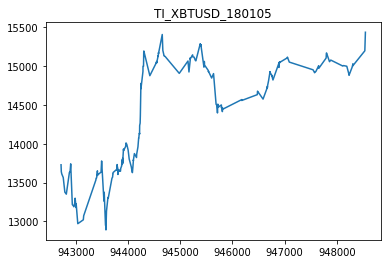

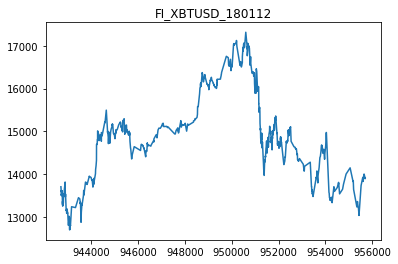

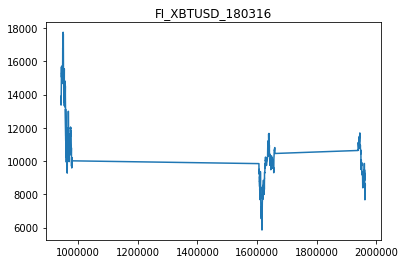

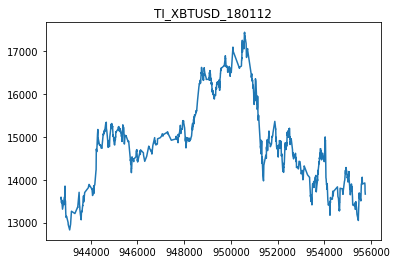

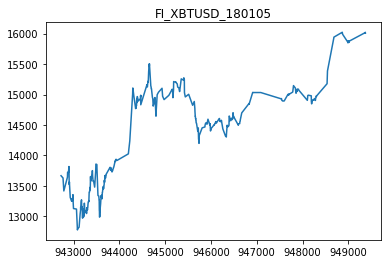

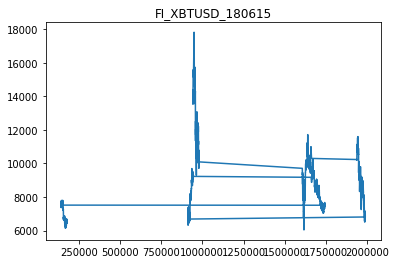

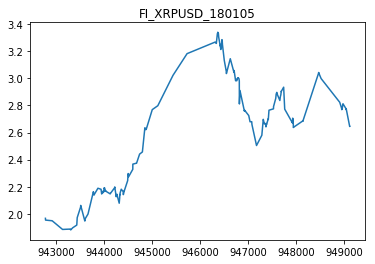

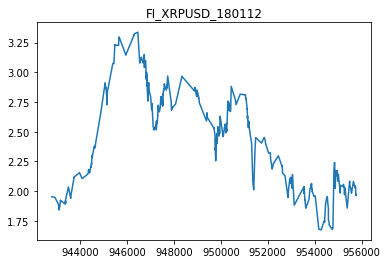

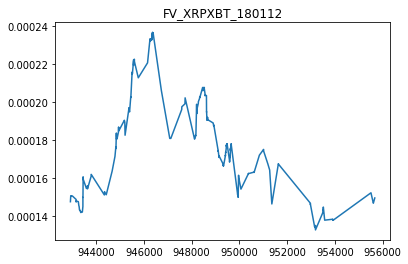

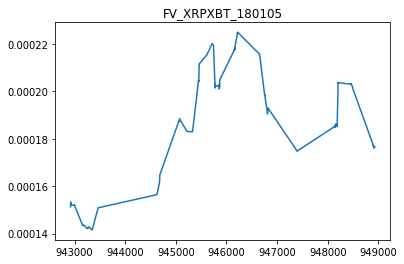

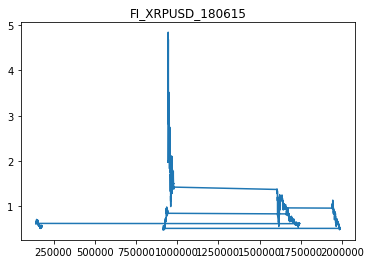

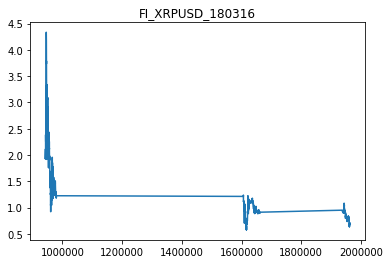

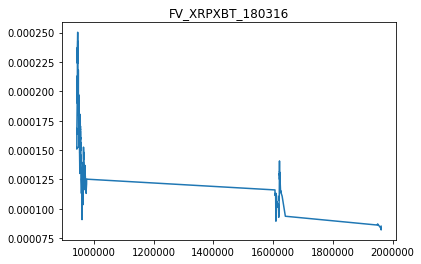

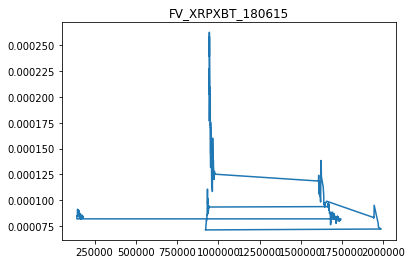

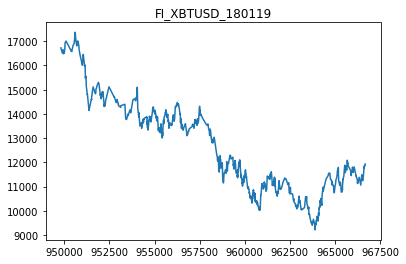

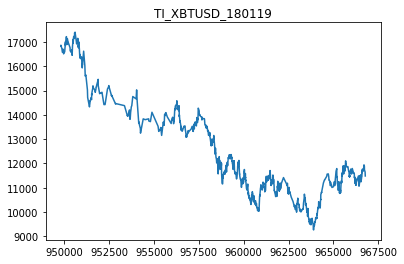

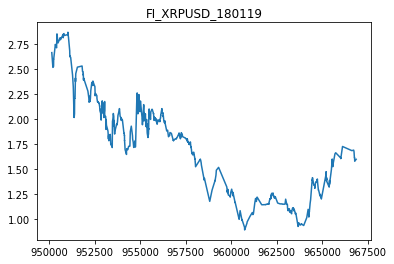

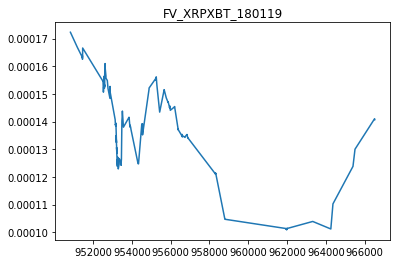

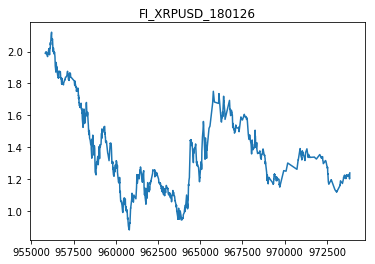

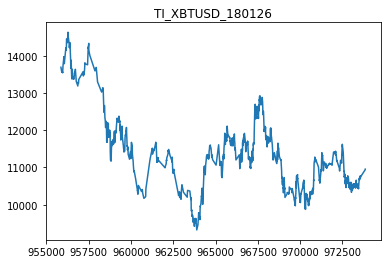

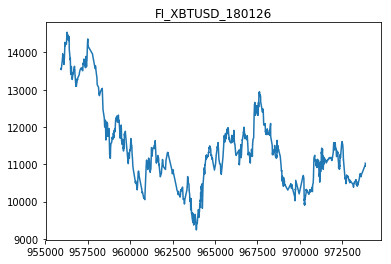

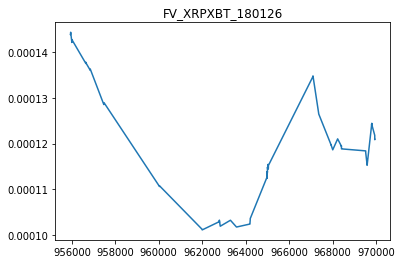

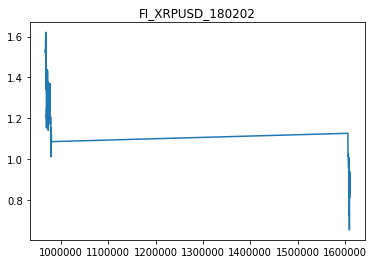

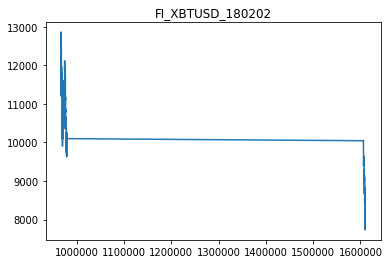

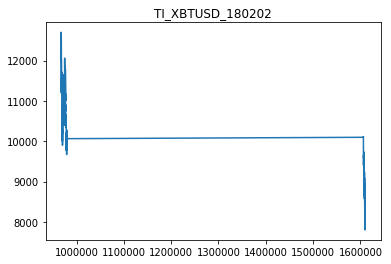

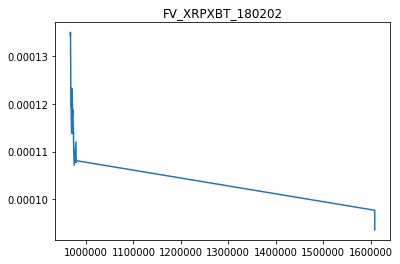

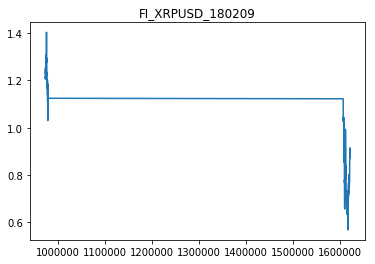

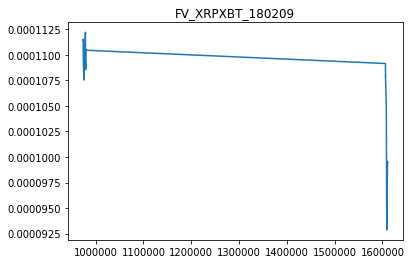

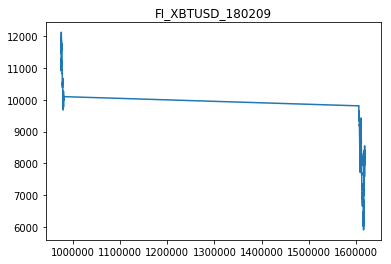

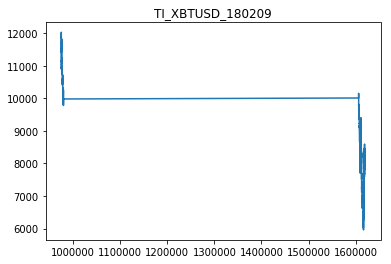

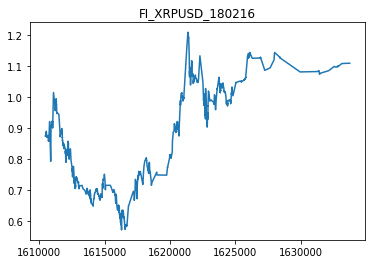

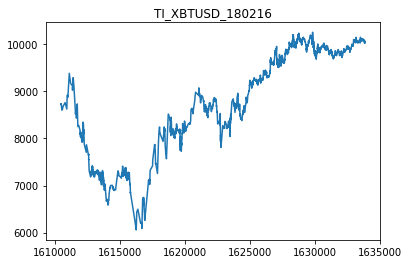

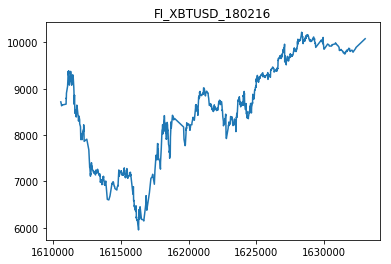

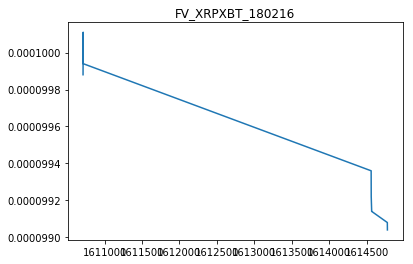

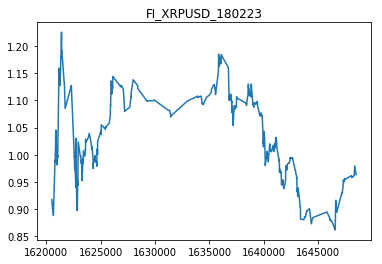

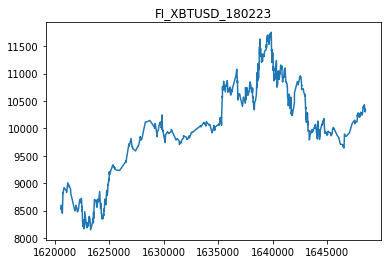

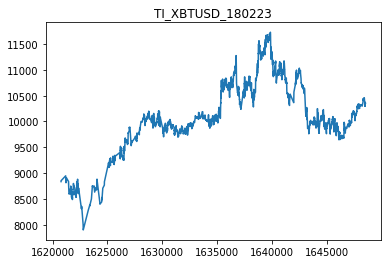

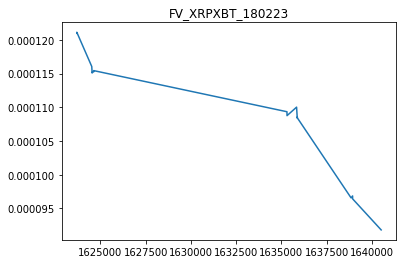

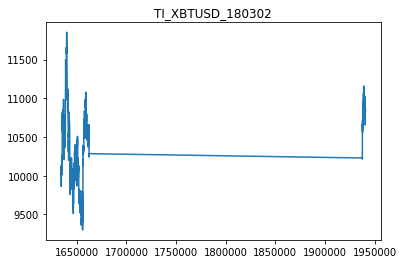

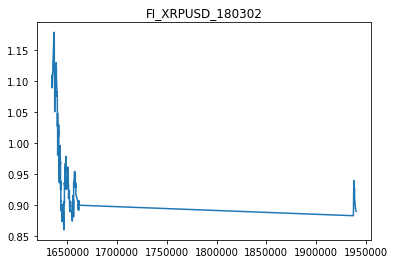

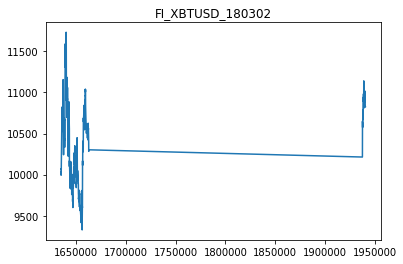

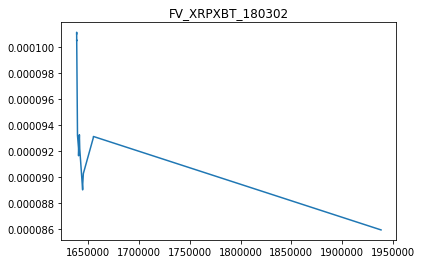

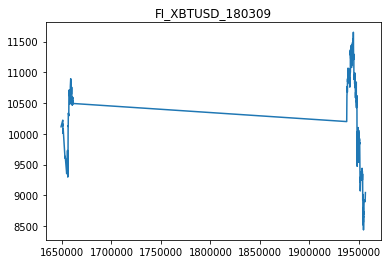

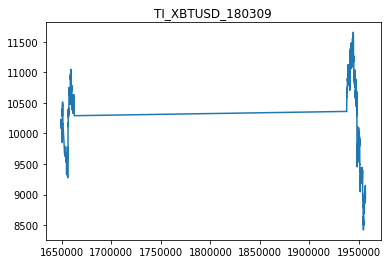

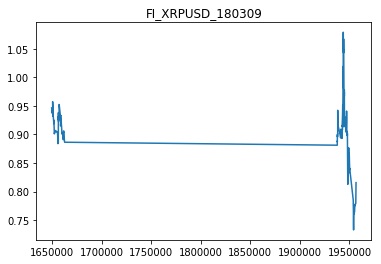

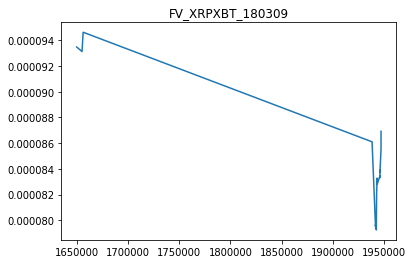

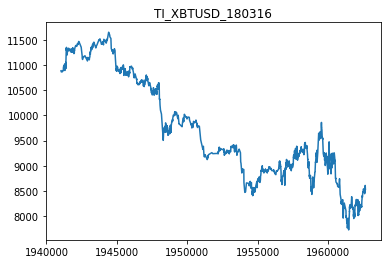

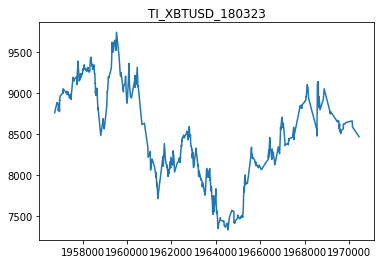

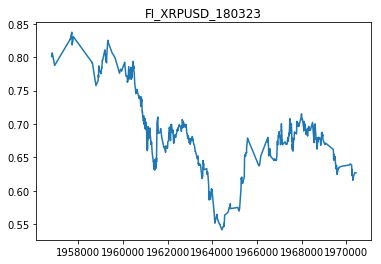

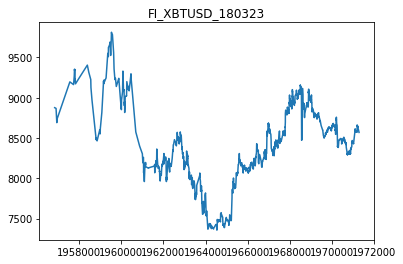

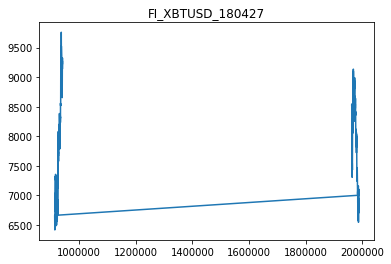

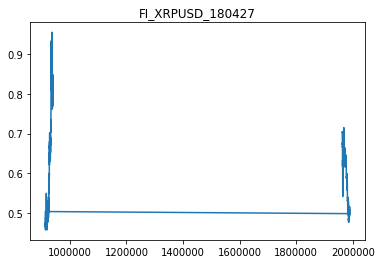

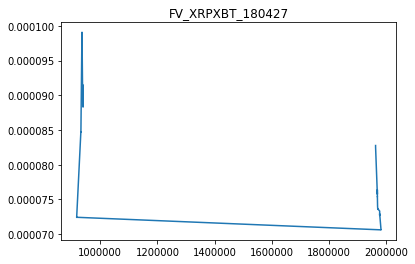

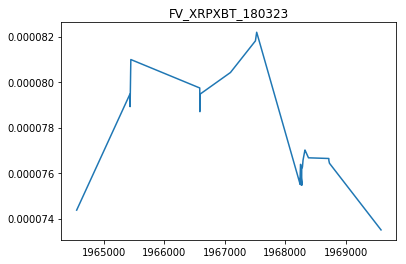

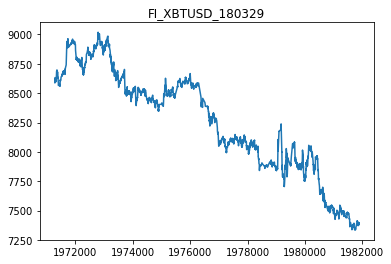

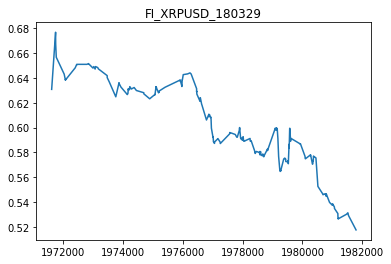

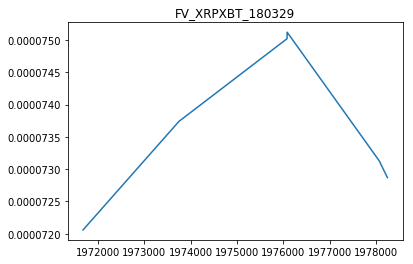

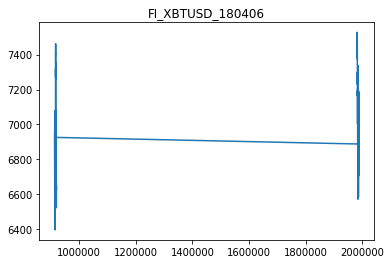

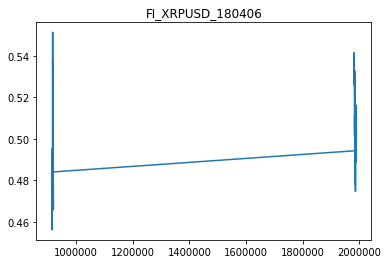

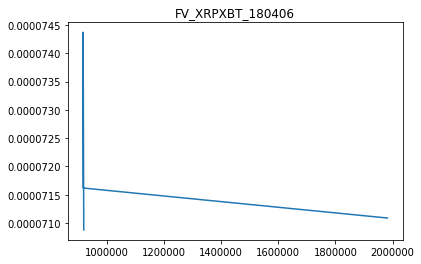

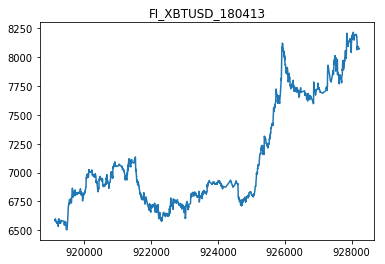

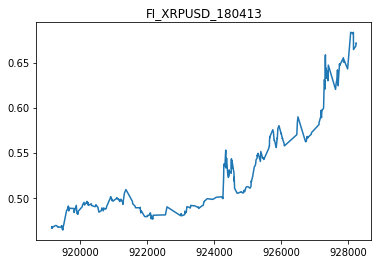

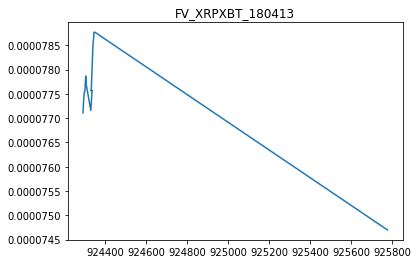

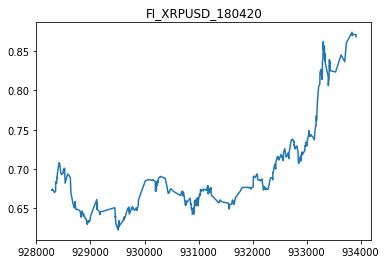

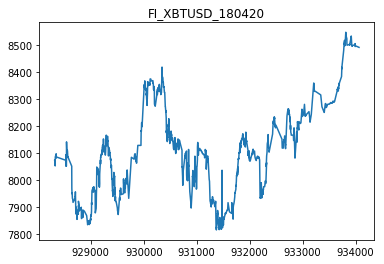

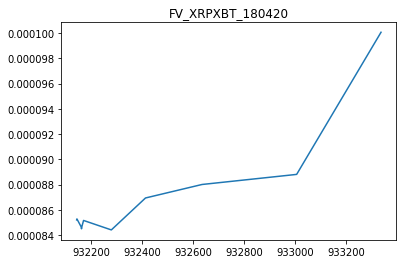

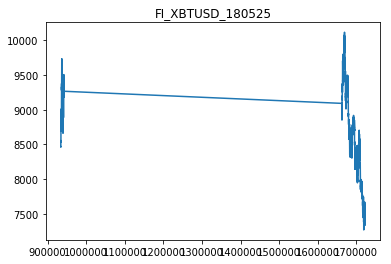

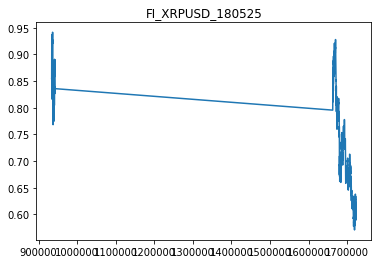

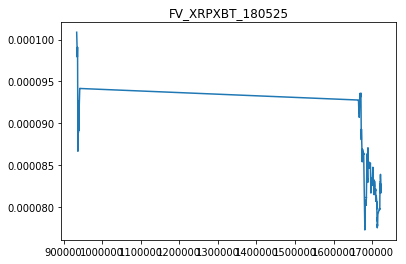

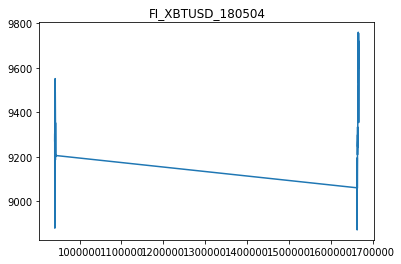

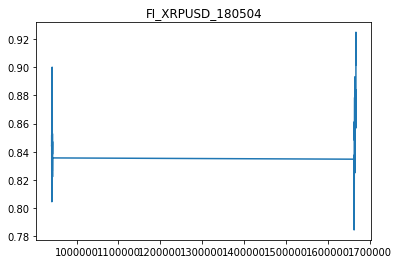

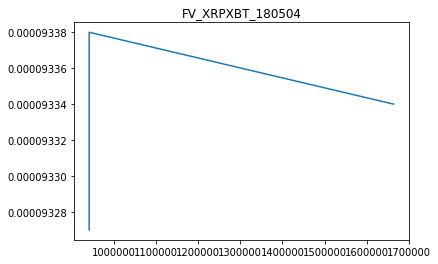

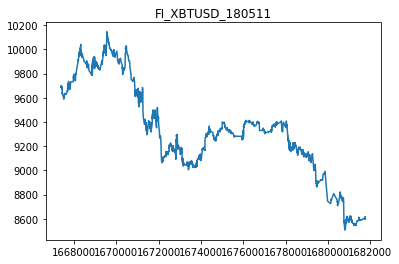

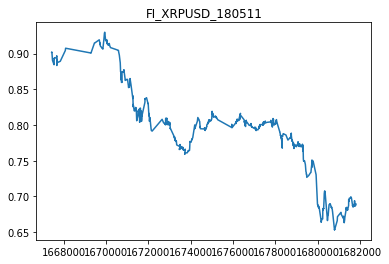

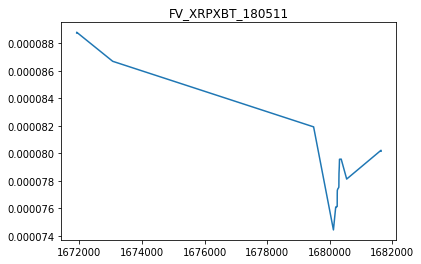

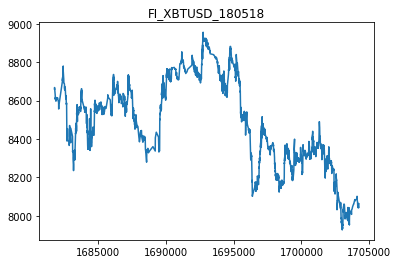

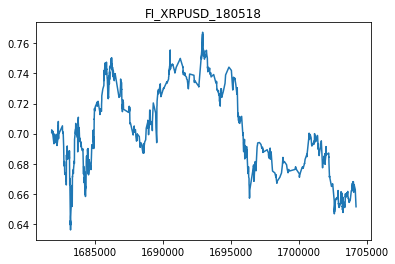

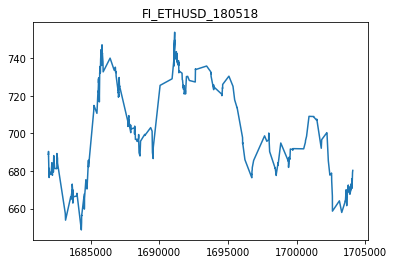

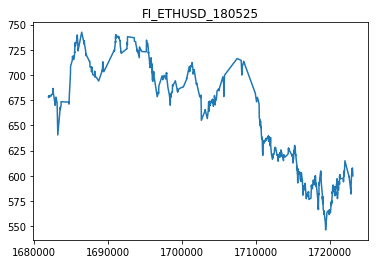

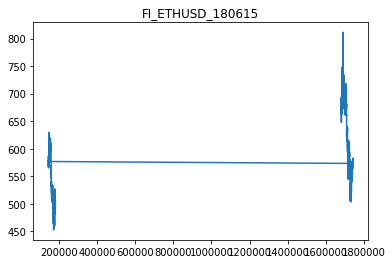

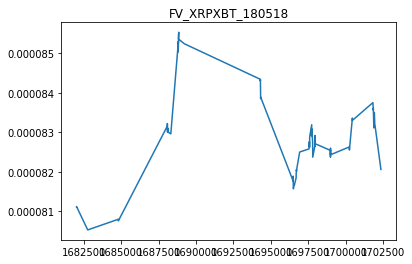

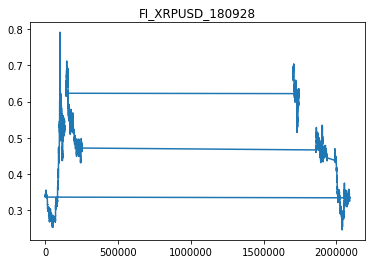

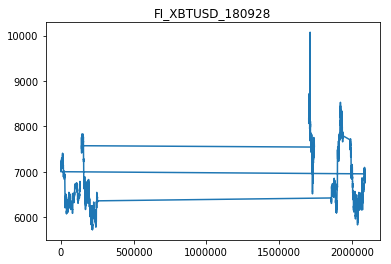

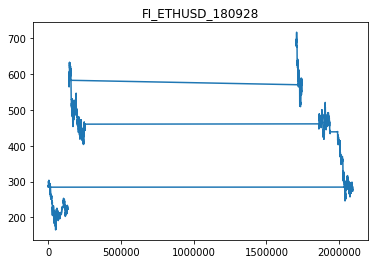

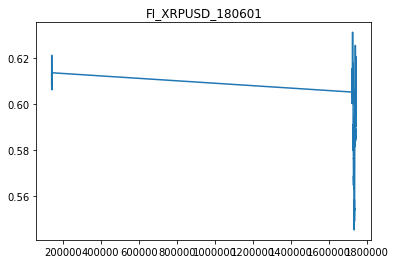

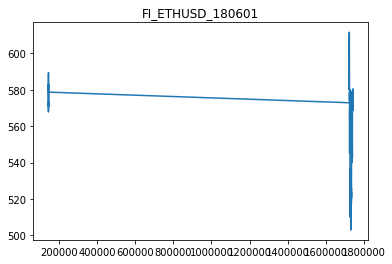

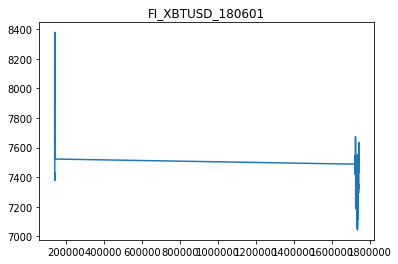

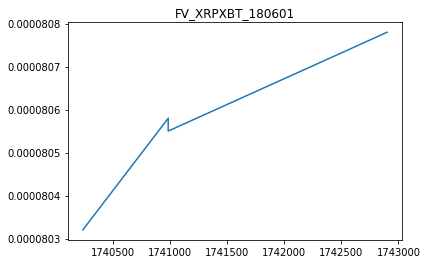

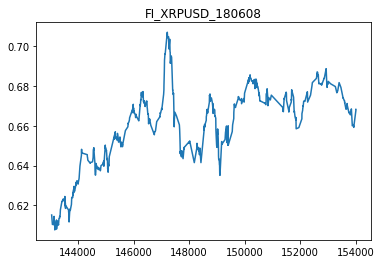

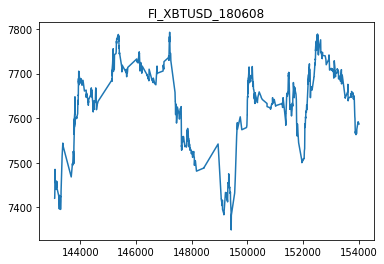

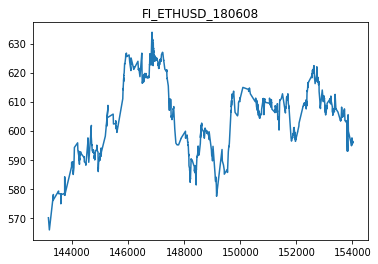

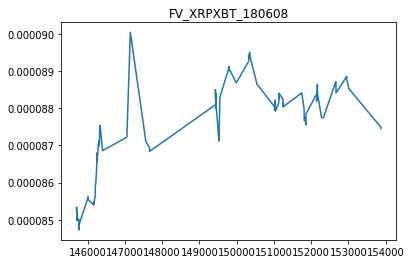

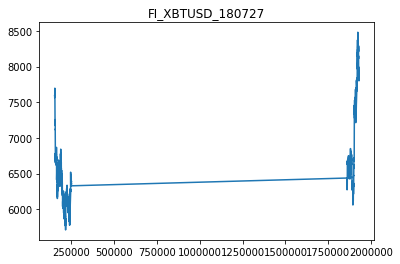

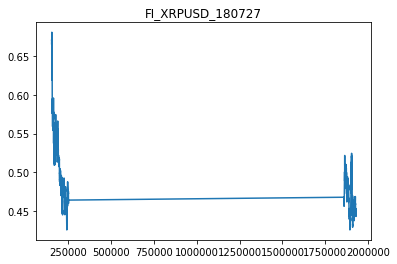

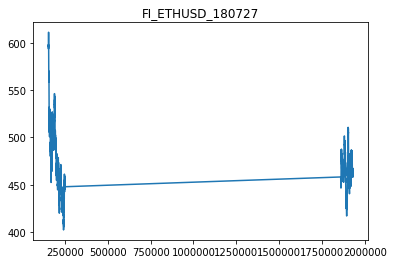

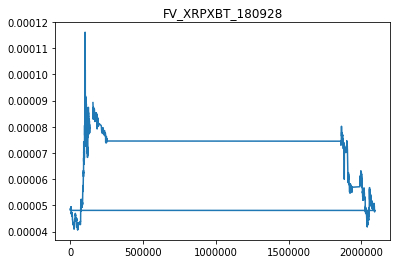

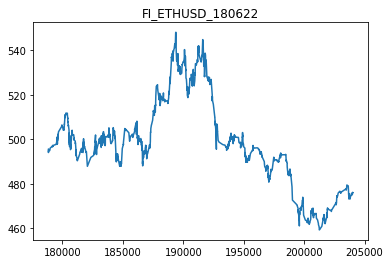

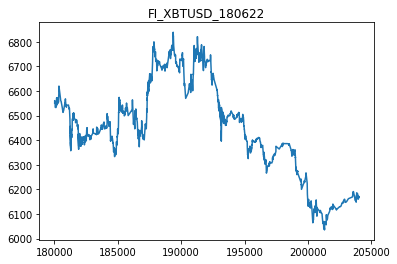

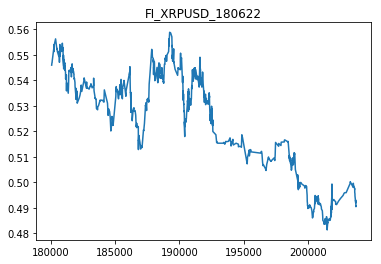

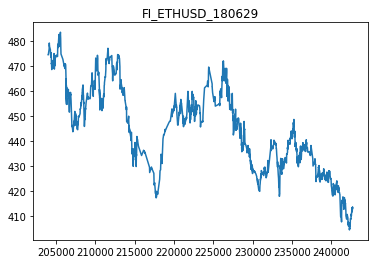

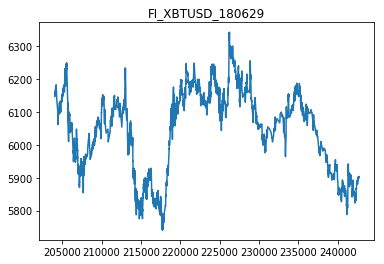

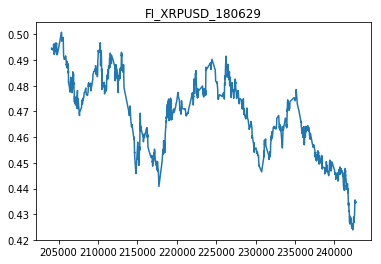

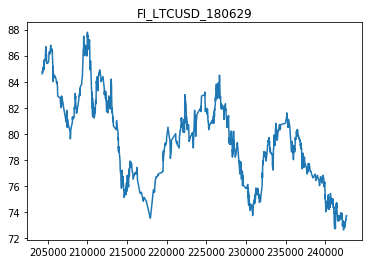

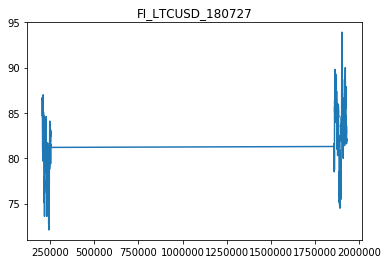

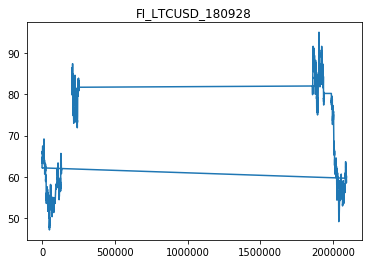

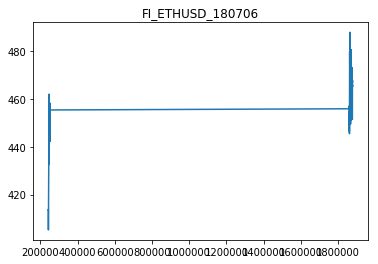

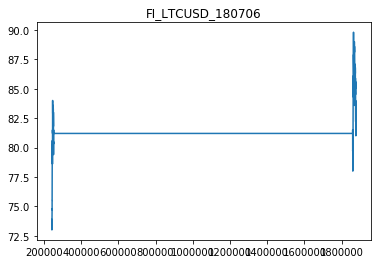

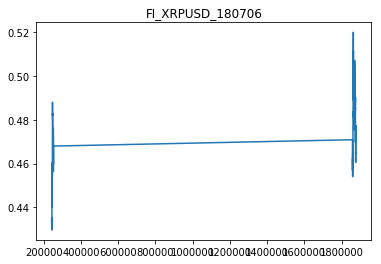

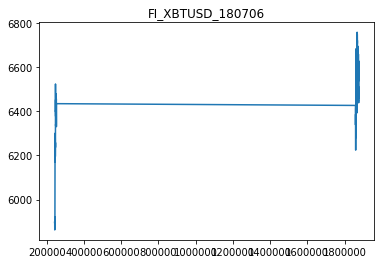

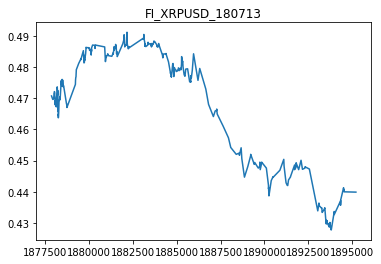

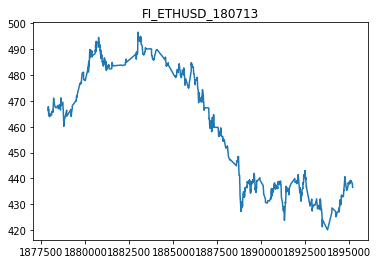

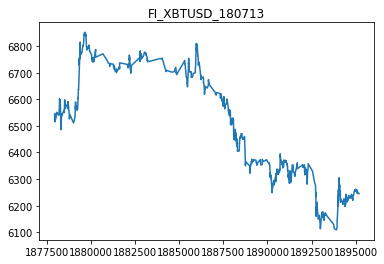

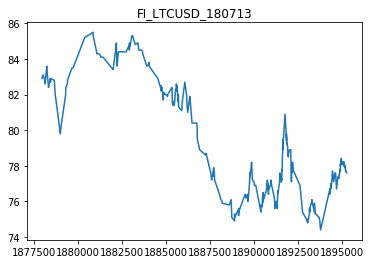

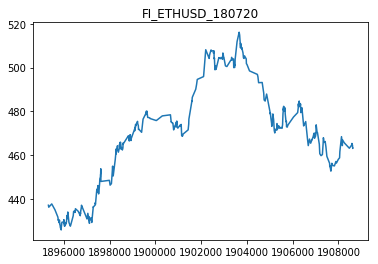

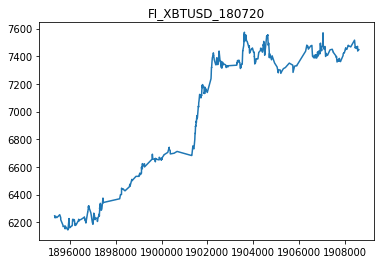

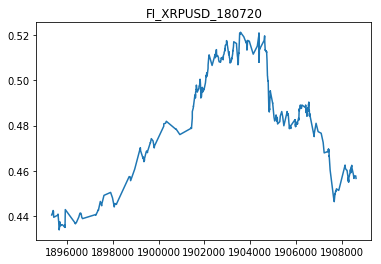

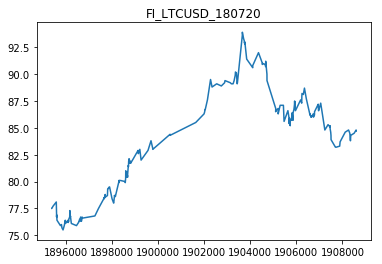

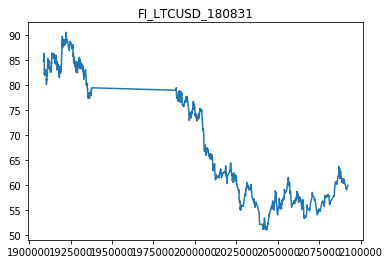

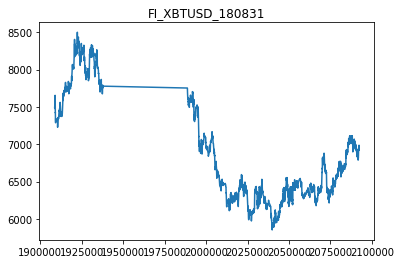

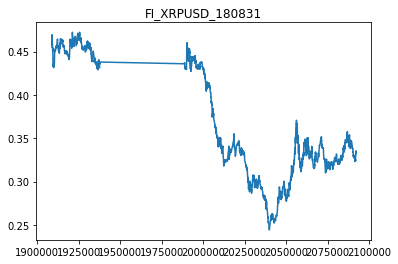

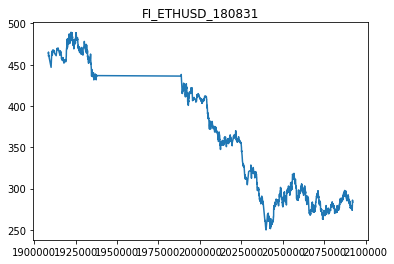

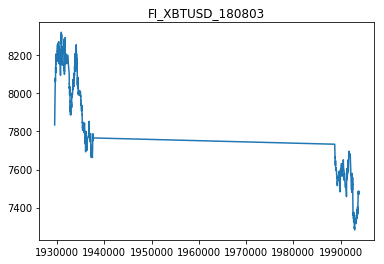

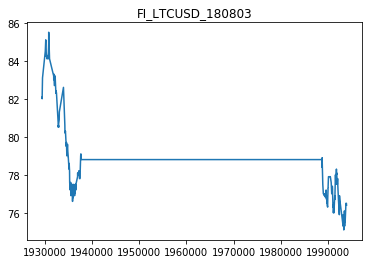

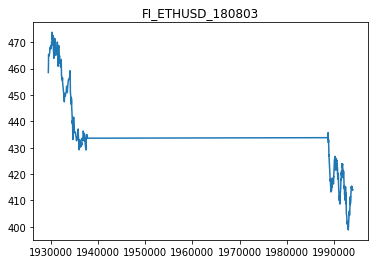

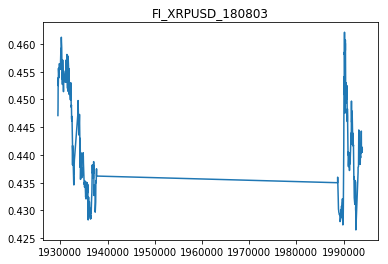

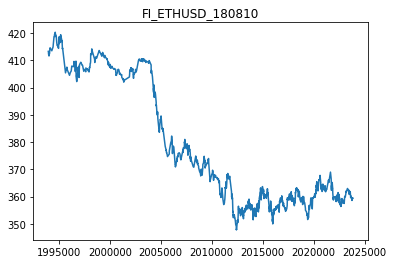

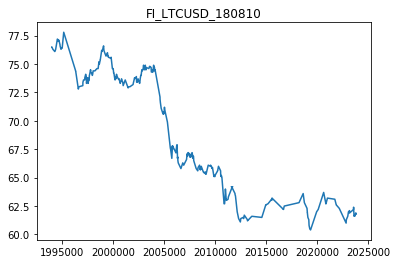

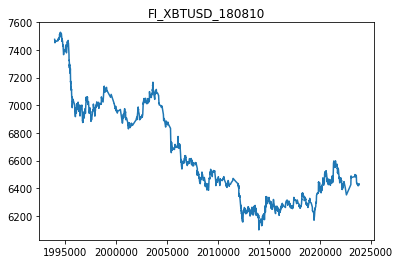

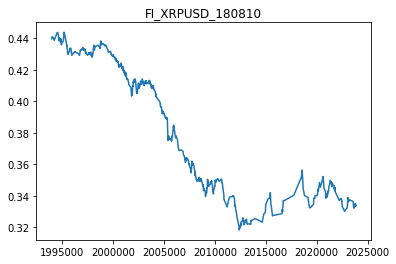

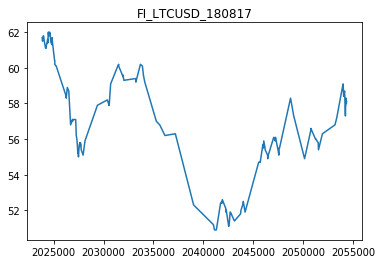

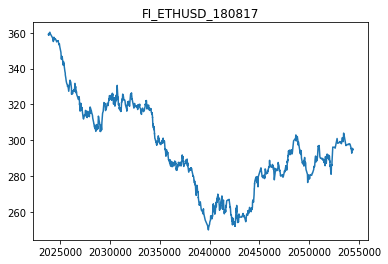

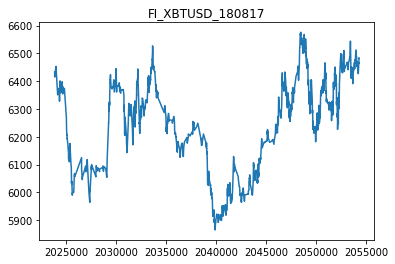

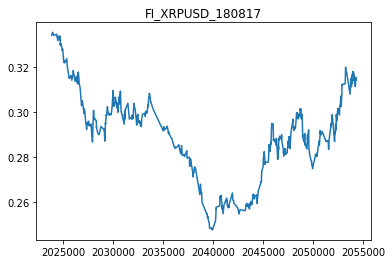

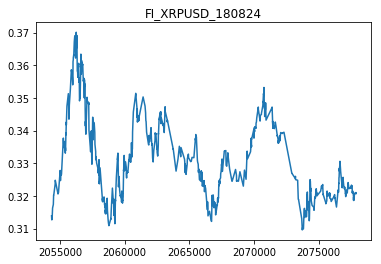

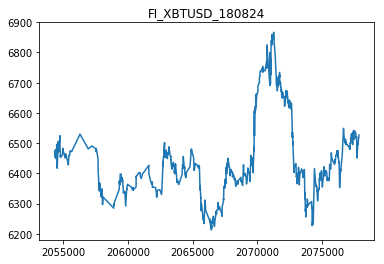

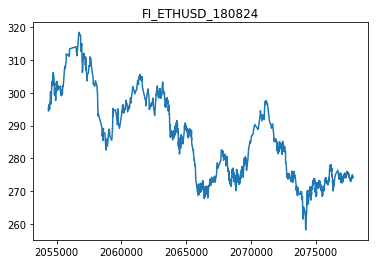

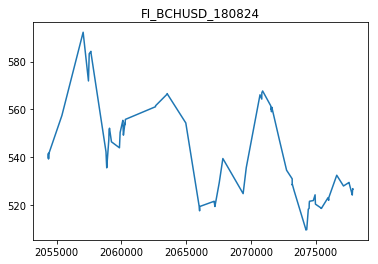

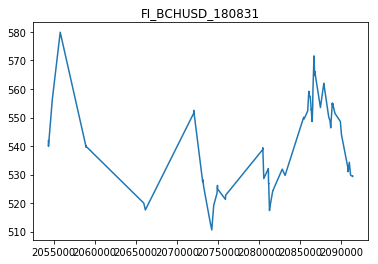

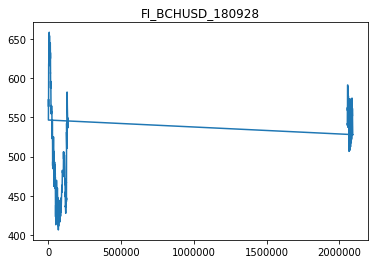

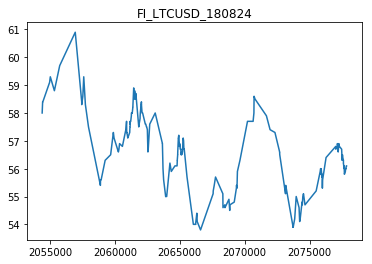

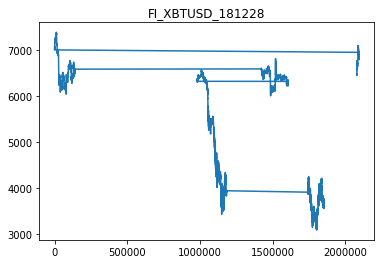

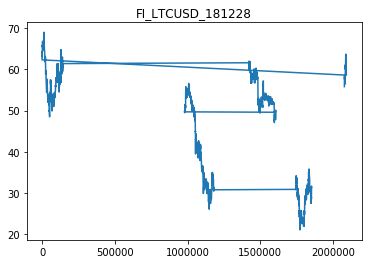

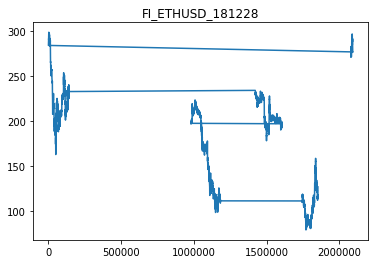

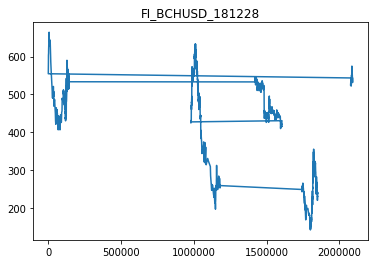

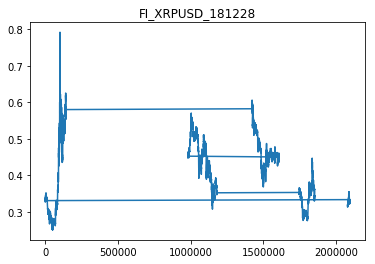

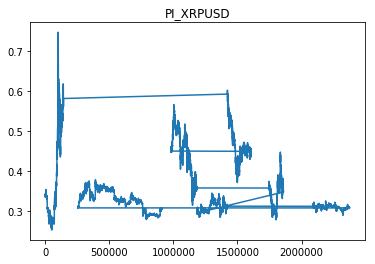

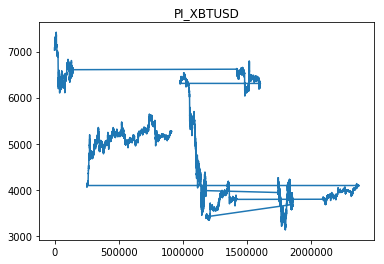

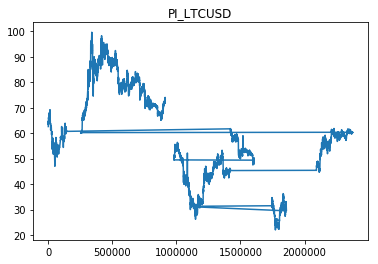

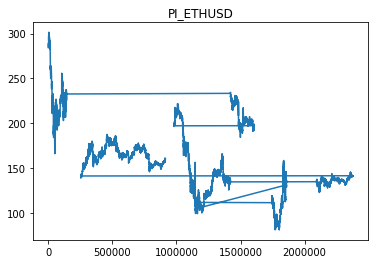

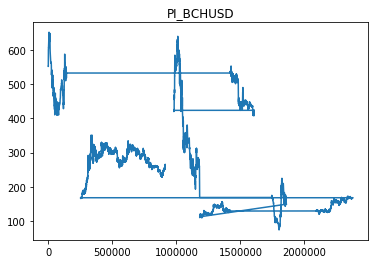

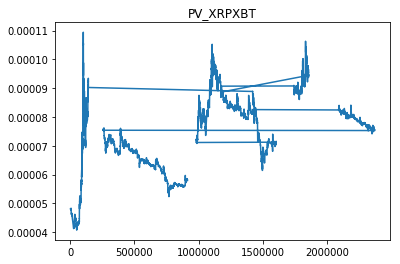

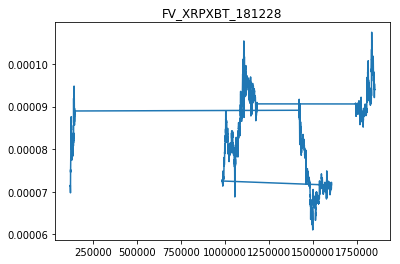

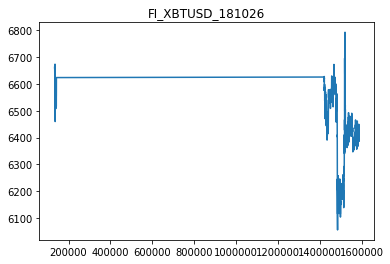

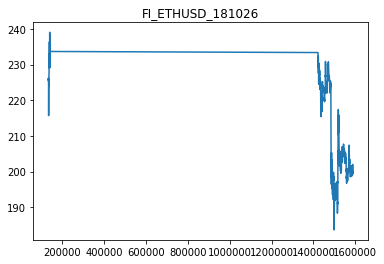

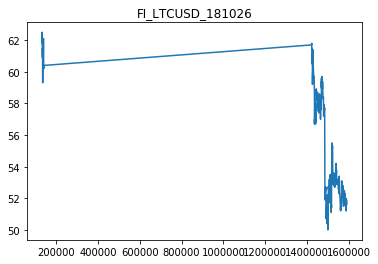

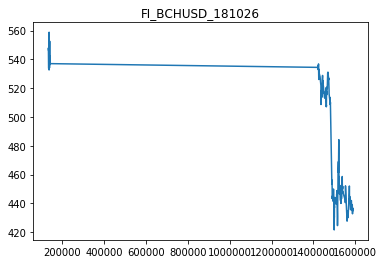

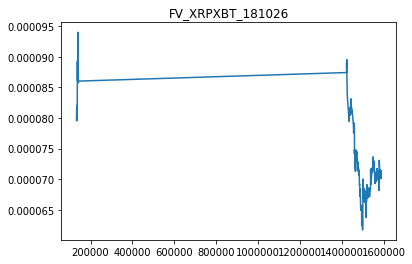

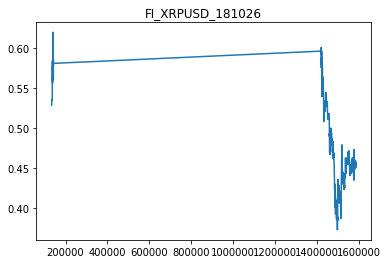

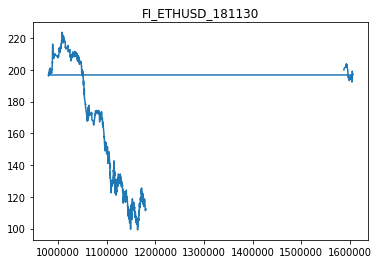

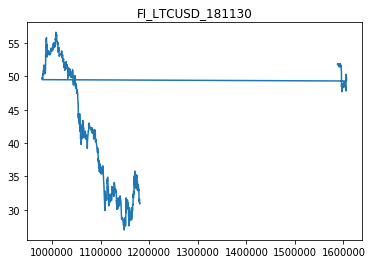

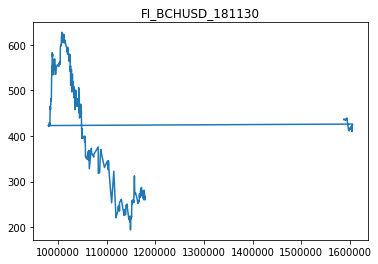

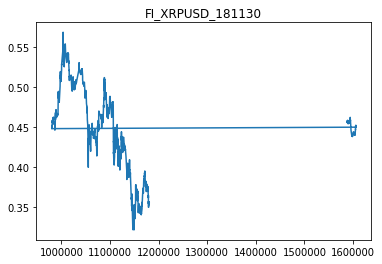

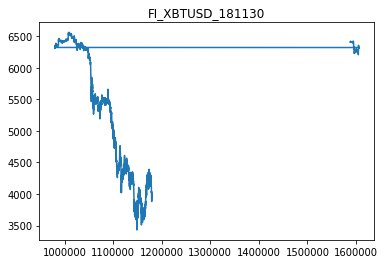

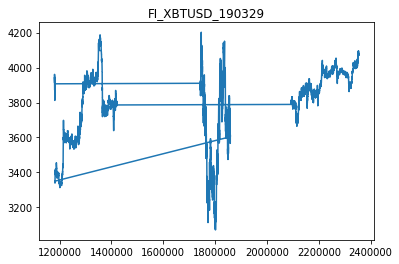

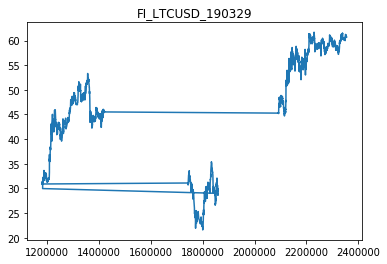

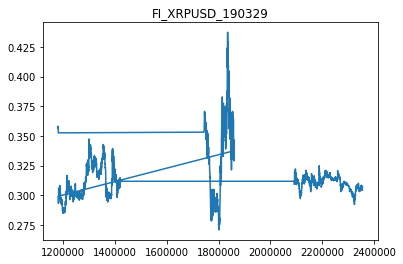

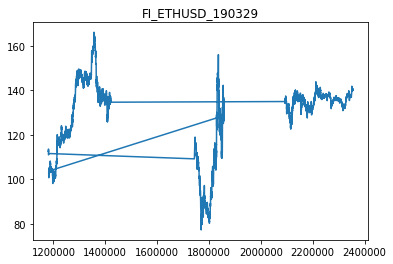

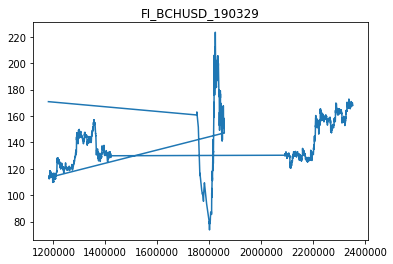

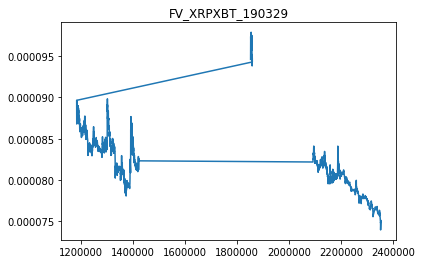

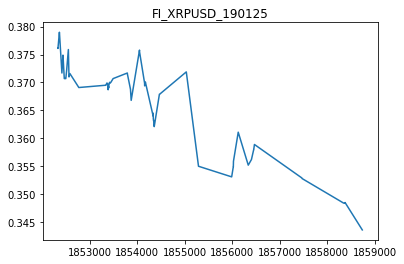

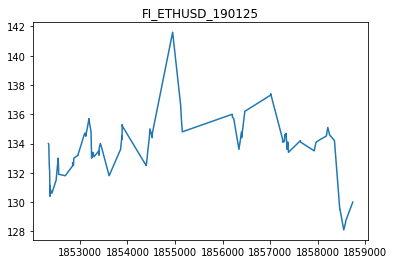

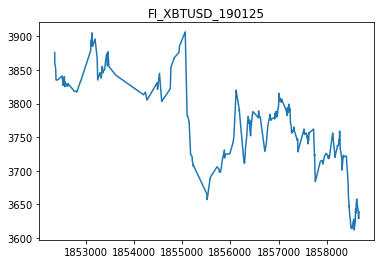

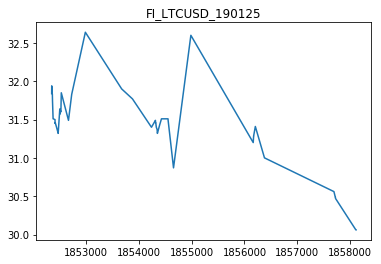

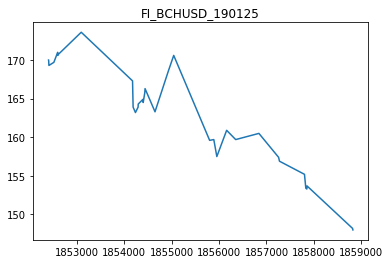

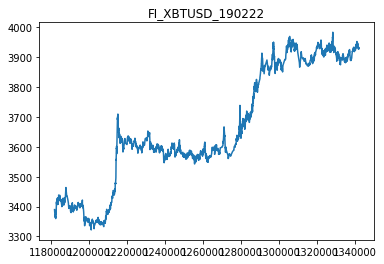

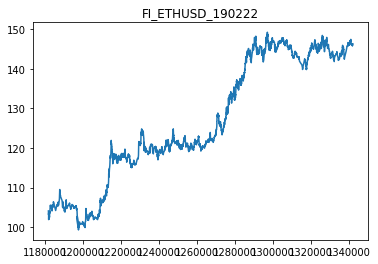

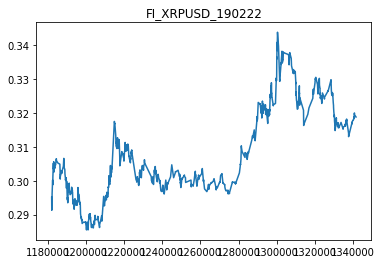

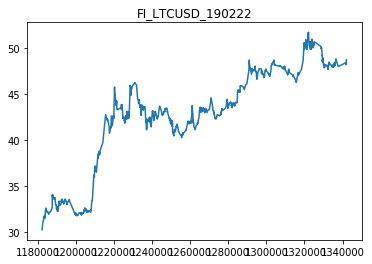

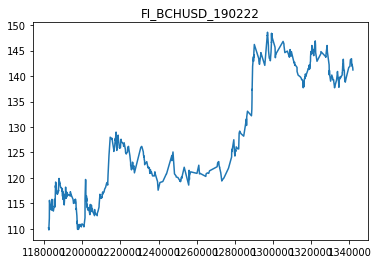

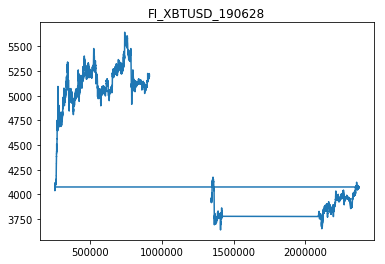

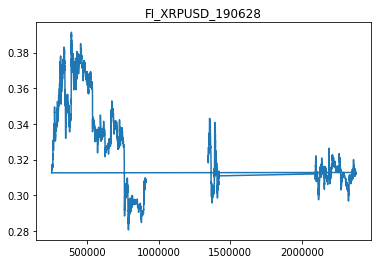

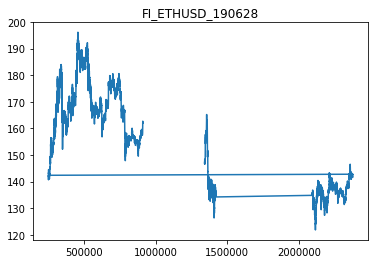

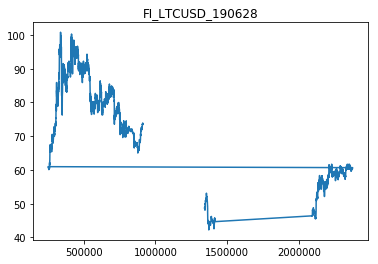

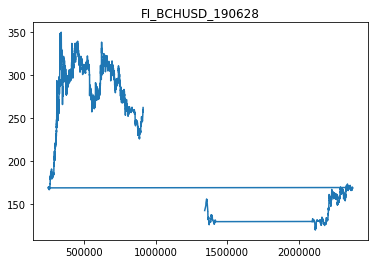

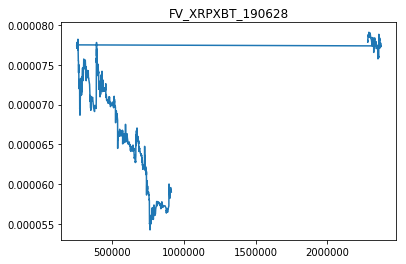

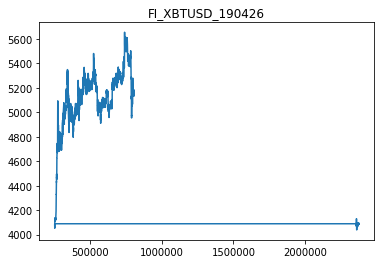

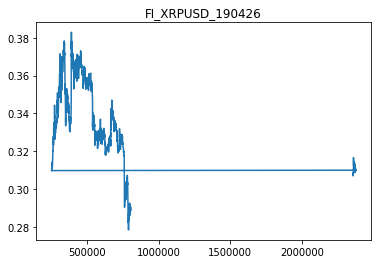

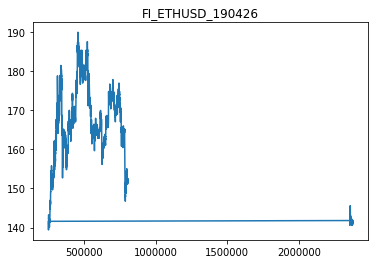

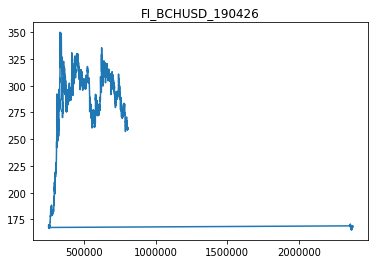

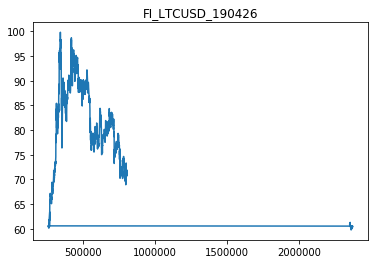

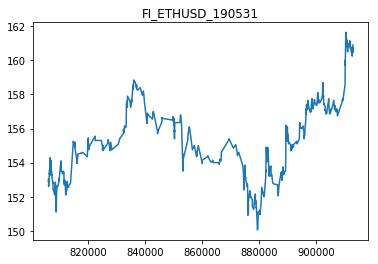

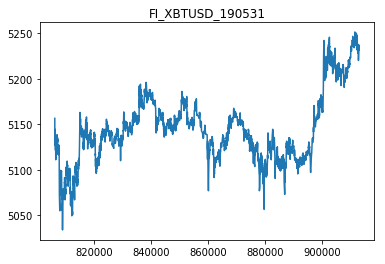

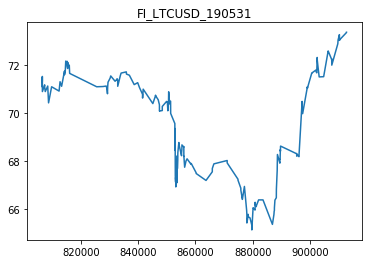

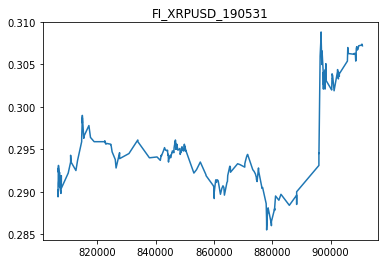

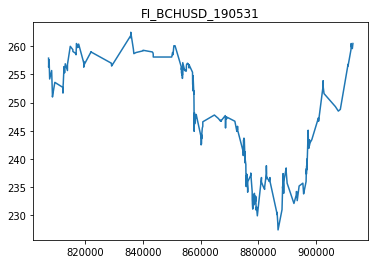

In [10]:
for pair in df.tradeable.unique():
    plt.figure()
    plt.title(pair)
    plt.plot(df[df.tradeable == pair].price)

# Compile OHLCV data

In [11]:
df['coin_volume'] = df['size']/df['price']

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [13]:
df_xbt = df[df.tradeable == "PI_XBTUSD"]

In [231]:
xbt_gby_minute = df_xbt.set_index('timestamp').groupby(pd.TimeGrouper(freq='5Min'))

xbt_ohlcv = pd.DataFrame()
xbt_ohlcv['high'] = xbt_gby_minute['price'].max()
xbt_ohlcv['low'] = xbt_gby_minute['price'].min()
xbt_ohlcv['open'] = xbt_gby_minute['price'].first()
xbt_ohlcv['close'] = xbt_gby_minute['price'].last()
xbt_ohlcv['volume'] = xbt_gby_minute['coin_volume'].sum()

/home/alex/.conda/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [232]:
df_xbt

,trade_id,timestamp,tradeable,price,size,aggressor,type,rti,coin_volume
24,d8a823de-7af3-49ad-ba33-898c7325868b,2018-09-01 00:08:02,PI_XBTUSD,7032.0,10000,seller,fill,7038.76,1.422071
29,aa70f784-a94d-4e5d-a9e9-47735529b427,2018-09-01 00:16:31,PI_XBTUSD,7032.0,5,buyer,fill,7035.55,0.000711
30,4784f888-29b4-4d4a-8b7e-742e5a8f7bfd,2018-09-01 00:16:34,PI_XBTUSD,7032.0,5,buyer,fill,7035.57,0.000711
31,ee8af480-9758-483b-95df-dd1521fe4d82,2018-09-01 00:16:36,PI_XBTUSD,7032.0,5,buyer,fill,7035.54,0.000711
32,8284b3bc-abd4-4413-b2d4-96a020b08f4c,2018-09-01 00:16:37,PI_XBTUSD,7032.0,5,buyer,fill,7035.58,0.000711
33,cb5c69f7-9626-4a8b-a378-6eff290920f7,2018-09-01 00:16:38,PI_XBTUSD,7032.0,5,buyer,fill,7035.61,0.000711
34,fac48c81-8a18-4664-b0b3-2b39ee7eb91d,2018-09-01 00:16:39,PI_XBTUSD,7032.0,5,buyer,fill,7035.59,0.000711
35,ac590fb3-ec7f-4d0a-8457-23f2f5dcbb94,2018-09-01 00:16:40,PI_XBTUSD,7032.0,5,buyer,fill,7035.54,0.000711
36,dbaa0557-d557-4fb0-bee7-9fd8e099940e,2018-09-01 00:16:40,PI_XBTUSD,7032.0,5,buyer,fill,7035.54,0.000711
37,b5d5ceca-b1fc-4ea5-af80-18042fb0b65c,2018-09-01 00:16:41,PI_XBTUSD,7032.0,5,buyer,fill,7035.61,0.000711


In [233]:
xbt_ohlcv

,high,low,open,close,volume
timestamp,,,,,
2018-09-01 00:05:00,7032.0,7032.0,7032.0,7032.0,1.422071
2018-09-01 00:10:00,NaN,NaN,NaN,NaN,0.000000
2018-09-01 00:15:00,7034.0,7032.0,7032.0,7034.0,0.006968
2018-09-01 00:20:00,NaN,NaN,NaN,NaN,0.000000
2018-09-01 00:25:00,NaN,NaN,NaN,NaN,0.000000
2018-09-01 00:30:00,NaN,NaN,NaN,NaN,0.000000
2018-09-01 00:35:00,NaN,NaN,NaN,NaN,0.000000
2018-09-01 00:40:00,NaN,NaN,NaN,NaN,0.000000
2018-09-01 00:45:00,NaN,NaN,NaN,NaN,0.000000


In [234]:
# Subtract the Fees

xbt_ohlcv['log_ret'] = 0
xbt_ohlcv['log_ret'].loc[:-1] = np.diff(np.log(xbt_ohlcv['close']), axis=0)
# xbt_ohlcv['log_ret'].loc[:-1] = np.diff(np.log(xbt_ohlcv['close']), axis=0) - np.log(1.0052)

In [235]:
xbt_ohlcv

,high,low,open,close,volume,log_ret
timestamp,,,,,,
2018-09-01 00:05:00,7032.0,7032.0,7032.0,7032.0,1.422071,NaN
2018-09-01 00:10:00,NaN,NaN,NaN,NaN,0.000000,NaN
2018-09-01 00:15:00,7034.0,7032.0,7032.0,7034.0,0.006968,NaN
2018-09-01 00:20:00,NaN,NaN,NaN,NaN,0.000000,NaN
2018-09-01 00:25:00,NaN,NaN,NaN,NaN,0.000000,NaN
2018-09-01 00:30:00,NaN,NaN,NaN,NaN,0.000000,NaN
2018-09-01 00:35:00,NaN,NaN,NaN,NaN,0.000000,NaN
2018-09-01 00:40:00,NaN,NaN,NaN,NaN,0.000000,NaN
2018-09-01 00:45:00,NaN,NaN,NaN,NaN,0.000000,NaN


# Generate Features

In [236]:
df_xbt_feat = xbt_ohlcv

In [237]:
feature_funcs = [func for func in dir(TA) if "_" not in func]

In [238]:
for func in feature_funcs:
    if func in ["LWMA", "ALMA", ]:
        continue
    try:
        df_xbt_feat[func] = eval("TA."+func+"(xbt_ohlcv)")
    except:
        print("Func: %s was untenable" % func) 

Func: APZ was untenable
Func: BASP was untenable
Func: BASPN was untenable
Func: BBANDS was untenable
Func: CHANDELIER was untenable
Func: DMI was untenable
Func: DO was untenable
Func: EBBP was untenable
Func: FRAMA was untenable
Func: ICHIMOKU was untenable
Func: KC was untenable
Func: KST was untenable
Func: MACD was untenable
Func: MAMA was untenable
Func: OBV was untenable
Func: PIVOT was untenable
Func: PPO was untenable
Func: SWI was untenable
Func: TMF was untenable
Func: TSI was untenable
Func: VIDYA was untenable
Func: VORTEX was untenable
Func: VR was untenable
Func: WTO was untenable


In [239]:
df_xbt_feat.columns

Index(['high', 'low', 'open', 'close', 'volume', 'log_ret', 'ADL', 'up_move',
       'down_move', 'DMp', 'DMm', 'ADX', 'AO', 'ATR', 'BBWIDTH', 'CCI', 'CFI',
       'CHAIKIN', 'CMO', 'COPP', 'DEMA', 'EFI', 'EMA', 'EMV', 'ER', 'EVWMA',
       'FISH', 'FVE', 'deltawma', 'HMA', 'KAMA', 'MFI', 'MI', 'MOM', 'MSD',
       'PZO', 'QSTICK', 'ROC', 'RSI', 'SAR', 'SMA', 'SMM', 'SMMA', 'SQZMI',
       'SSMA', 'STOCH', 'STOCHD', 'STOCHRSI', 'TEMA', 'll', 'hh', 'range',
       'rangev', 'TP', 'TR', 'TRIMA', 'TRIX', 'UO', 'VAMA', 'VFI', 'VPT',
       'VWAP', 'VZO', 'WILLIAMS', 'WMA', 'WOBV', 'ZLEMA'],
      dtype='object')

In [258]:
df_xbt_feat.fillna(value=pd.np.nan, inplace=True)

In [260]:
for feat in df_xbt_feat.columns[6:]:
    df_xbt_feat[feat+"_delta"] = 0
    df_xbt_feat[feat+"_delta"].iloc[1:] = np.diff(df_xbt_feat[feat].values, axis=0)

In [261]:
# REmove NaNs

df_xbt_clean = df_xbt_feat[pd.notnull(df_xbt_feat['log_ret'])]

In [283]:
df_xbt_clean = df_xbt_clean.fillna(0)
df_xbt_clean = df_xbt_clean.replace([np.inf, -np.inf], np.nan)
df_xbt_clean = df_xbt_clean[~df_xbt_clean.isin([np.nan, np.inf, -np.inf]).any(1)]

In [284]:
df_xbt_clean

,high,low,open,close,volume,log_ret,ADL,up_move,down_move,DMp,...,SQZMI_delta_delta,SSMA_delta_delta,STOCH_delta_delta,STOCHD_delta_delta,STOCHRSI_delta_delta,TEMA_delta_delta,ll_delta_delta,hh_delta_delta,range_delta_delta,rangev_delta_delta
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-09-01 02:10:00,7043.0,7043.0,7043.0,7043.0,0.000568,-0.000142,0.000000e+00,0.0,0.0,0.0,...,0,3.448094,0.000000,0.000000,0.000000e+00,7.830520,0.0,0.0,0.000000,0.0
2018-09-01 03:35:00,7055.0,7048.0,7048.0,7055.0,0.743605,0.001133,5.219169e+00,0.0,0.0,0.0,...,0,4.967263,0.000000,0.000000,0.000000e+00,16.053938,0.0,0.0,0.000000,0.0
2018-09-01 09:20:00,7064.0,7064.0,7064.0,7064.0,0.003539,0.001839,0.000000e+00,0.0,0.0,0.0,...,0,5.927486,0.000000,0.000000,0.000000e+00,11.493167,0.0,0.0,0.000000,0.0
2018-09-01 10:25:00,7079.0,7079.0,7079.0,7079.0,0.007063,-0.000141,0.000000e+00,0.0,0.0,0.0,...,0,5.847902,0.000000,0.000000,1.110223e-16,19.602053,0.0,0.0,0.000000,0.0
2018-09-01 10:55:00,7090.0,7088.0,7089.0,7089.0,0.002257,0.001128,8.228547e+00,0.0,0.0,0.0,...,0,5.736290,0.000000,0.000000,1.110223e-16,19.529805,0.0,0.0,0.000000,0.0
2018-09-01 11:00:00,7097.0,7094.0,7094.0,7097.0,2.818688,0.000000,1.668461e+01,7.0,-6.0,7.0,...,0,-0.519183,0.000000,0.000000,2.036572e-02,-8.073899,0.0,0.0,0.000000,0.0
2018-09-01 11:05:00,7097.0,7097.0,7097.0,7097.0,0.102156,-0.001833,0.000000e+00,0.0,-3.0,0.0,...,0,-2.110819,0.000000,0.000000,1.110223e-16,-8.774901,7.0,-7.0,0.000000,0.0
2018-09-01 11:10:00,7084.0,7084.0,7084.0,7084.0,0.141163,0.000423,0.000000e+00,-13.0,13.0,0.0,...,0,-3.903878,0.000000,0.000000,-4.437282e-02,-12.166248,-21.0,0.0,0.000000,0.0
2018-09-01 12:00:00,7048.0,7048.0,7048.0,7048.0,0.141884,0.000000,0.000000e+00,0.0,0.0,0.0,...,0,-9.222464,0.000000,0.000000,0.000000e+00,-39.848585,0.0,0.0,0.000000,0.0


# Run Linear Regression

In [285]:
import statsmodels.api as sm

In [286]:
response = df_xbt_clean['log_ret']

In [287]:
constants = np.expand_dims(np.ones(response.shape), axis=1)

In [288]:
predictors = df_xbt_clean.iloc[:, 6:]

In [289]:
predictors = np.concatenate([predictors.values, constants], axis=1)

In [290]:
predictors = predictors.astype('float64')

In [291]:
model = sm.OLS(response, predictors).fit()

In [292]:
model.summary()

/home/alex/.conda/envs/analysis/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/alex/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/alex/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/alex/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_ret   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.045
Date:                Thu, 16 May 2019   Prob (F-statistic):           3.33e-93
Time:                        19:07:44   Log-Likelihood:             1.1308e+05
No. Observations:               25263   AIC:                        -2.259e+05
Df Residuals:                   25131   BIC:                        -2.248e+05
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.443e-11   2.95e-11     -0.489      0.625   -7.23e-11    4.35e-11
x2          2.027e-05   1.04e-05      1.948      0.051   -1.25e-07    4.07e-05
x3         -4.542e-05   1.08e-05     -4.188      0.000   -6.67e-05   -2.42e-05
x4          3.138e-05   8.69e-06      3.613      0.000    1.44e-05    4.84e-05
x5         -3.698e-05   8.69e-06     -4.255      0.000    -5.4e-05   -1.99e-05
x6           4.07e-07   2.02e-06      0.202      0.840   -3.55e-06    4.36e-06
x7         -4.138e-07    4.3e-06     -0.096      0.923   -8.85e-06    8.02e-06
x8         -1.529e-05   4.62e-06     -3.308      0.001   -2.43e-05   -6.23e-06
x9          9.717e-07   1.12e-05      0.087      0.931   -2.09e-05    2.29e-05
x10         1.855e-05   3.76e-05      0.493      0.622   -5.52e-05    9.23e-05
x11         6.326e-11   1.91e-10      0.331      0.741   -3.12e-10    4.38e-10
x12          2.63e-09   2.42e-08      0.109      0.913   -4.48e-08       5e-08
x13        -6.319e-07   1.68e-06     -0.377      0.706   -3.92e-06    2.65e-06
x14         7.183e-05   3.09e-05      2.321      0.020    1.12e-05       0.000
x15        -5.563e-05   1.85e-05     -3.006      0.003   -9.19e-05   -1.94e-05
x16        -7.416e-10   4.47e-10     -1.658      0.097   -1.62e-09    1.35e-10
x17         5.941e-05   2.22e-05      2.677      0.007    1.59e-05       0.000
x18         4.486e-19   5.53e-18      0.081      0.935   -1.04e-17    1.13e-17
x19            0.0001      0.000      0.667      0.505      -0.000       0.000
const      -3.617e-07   9.96e-07     -0.363      0.717   -2.31e-06    1.59e-06
x20         1.585e-06   3.08e-06      0.515      0.607   -4.45e-06    7.62e-06
x21         3.446e-06   1.14e-06      3.023      0.003    1.21e-06    5.68e-06
x22        -6.294e-09   4.33e-08     -0.145      0.884   -9.11e-08    7.85e-08
x23        -1.255e-08   9.51e-09     -1.320      0.187   -3.12e-08    6.09e-09
x24         1.245e-07   3.13e-07      0.398      0.690   -4.88e-07    7.37e-07
x25        -1.601e-08   5.79e-08     -0.276      0.782   -1.29e-07    9.75e-08
x26         1.667e-05   4.17e-05      0.400      0.689    -6.5e-05    9.84e-05
x27        -6.275e-06   1.07e-06     -5.883      0.000   -8.37e-06   -4.18e-06
x28         2.872e-06   2.97e-06      0.968      0.333   -2.95e-06    8.69e-06
x29        -1.448e-06   1.37e-06     -1.055      0.292   -4.14e-06    1.24e-06
x30           -0.0009      0.003     -0.350      0.726      -0.006       0.004
x31           -0.0004   4.58e-05     -7.959      0.000      -0.000      -0.000
x32         1.129e-06   2.52e-06      0.449      0.654    -3.8e-06    6.06e-06
x33         7.042e-16   2.08e-15      0.338      0.735   -3.38e-15    4.79e-15
x34        -3.322e-08    3.7e-08     -0.897      0.370   -1.06e-07    3.94e-08
x35         7.252e-07   6.35e-06      0.114      0.909   -1.17e-05    1.32e-05
x3